In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
total_data=pd.read_csv('income2023f/totaldata.csv')
total_data = total_data.iloc[: , 1:]
total_data=total_data.drop('fnlwgt',axis=1)
total_data.iloc[:,:-1]=scaler.fit_transform(total_data.iloc[:,:-1])
train_datam=total_data[total_data['income>50K']!=-999]
test_datam=total_data[total_data['income>50K']==-999]
train_datam.loc[train_datam['income>50K']==0,['income>50K']]=-1
train_data=train_datam.iloc[:20000]
test_data=train_datam.iloc[20000:]
test_data=test_data.reset_index(drop=True)

<ipython-input-3-2014e5f856cc>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total_data.iloc[:,:-1]=scaler.fit_transform(total_data.iloc[:,:-1])


In [ ]:
def affine_layer_forward(input,W,b):
  output=np.dot(input,W)+b
  cache=input,W,b
  return output, cache

In [ ]:
def sgm_forward(input):
  output=1/(1 + np.exp(-input))
  cache=output
  return output,cache

In [ ]:
def sgm(input):
  output=1/(1 + np.exp(-input))
  cache=output
  return output

In [ ]:
def affine_layer_backward(dx,cache):
  input,W,b=cache
  #print(dx.shape,W.shape)
  try:
    dz=np.dot(dx,W.T)
  except:
    dz=np.outer(dx,W)
  dw=np.dot(input.T,dx)
  db=np.sum(dx,axis=0)
  return dz,dw,db

In [ ]:
def sgm_backward(dx,cache):
  output=cache
  #print(output.shape)
  m=np.multiply(output,(1-output))
  back=np.multiply(m,dx)
  return back

In [ ]:
def sq_loss(Y,y):
  loss=np.sum(1/2*(Y-y)**2)
  grad=(Y-y)
  return loss, grad

In [ ]:
def three_layer_nn_train(train_data,T,hid_dim,lr,d,ran,z=0):
  if z==0:
    np.random.seed(ran)
    w1=np.random.randn(13,hid_dim-1)
    b1=np.ones(hid_dim-1)
    w2=np.random.randn(hid_dim-1,hid_dim-1)
    b2=np.ones(hid_dim-1)
    w3=np.random.randn(hid_dim-1)
    b3=1
  elif z==1:
    w1=np.zeros((13,hid_dim-1))
    b1=np.zeros(hid_dim-1)
    w2=np.zeros((hid_dim-1,hid_dim-1))
    b2=np.zeros(hid_dim-1)
    w3=np.zeros(hid_dim-1)
    b3=0
  losses=[]
  for i in range(T):
    train_data=train_data.sample(frac = 1)
    y=train_data.iloc[:,-1]
    x=train_data.iloc[:,:-1]
    x=x.to_numpy()
    y=y.to_numpy()
    gamma_t= lr/(1+(lr/d)*i)
    for j in range(len(x)):
      op1,alcache1=affine_layer_forward(x[j].reshape(1,-1),w1,b1)
      op2,scache1=sgm_forward(op1)
      op3,alcache2=affine_layer_forward(op2,w2,b2)
      op4,scache2=sgm_forward(op3)
      Y,alcache3=affine_layer_forward(op4,w3,b3)
      loss,grad=sq_loss(Y,y[j])

      dx,dw3,db3=affine_layer_backward(grad,alcache3)
      dx=sgm_backward(dx,scache2)
      dx,dw2,db2=affine_layer_backward(dx,alcache2)
      dx=sgm_backward(dx,scache1)
      dx,dw1,db1=affine_layer_backward(dx,alcache1)

      w1-=gamma_t*(dw1)
      w2-=gamma_t*(dw2)
      w3-=gamma_t*(dw3)
      b1-=gamma_t*(db1)
      b2-=gamma_t*(db2)
      b3-=gamma_t*(db3)
      losses.append(loss)

  return losses,(w1,w2,w3,b1,b2,b3)





In [ ]:
def predict_nn(test_data,w1,w2,w3,b1,b2,b3):
  y=test_data.iloc[:,-1]
  x=test_data.iloc[:,:-1]
  x=x.to_numpy()
  y=y.to_numpy()
  op1,alcache1=affine_layer_forward(x,w1,b1)
  op2,scache1=sgm_forward(op1)
  op3,alcache2=affine_layer_forward(op2,w2,b2)
  op4,scache2=sgm_forward(op3)
  Y,alcache3=affine_layer_forward(op4,w3,b3)
  diff=np.where((np.sign(Y)*y)==-1,1,0)
  return(np.sum(diff)/diff.shape[0])

Training error: 0.23745
Test error: 0.244


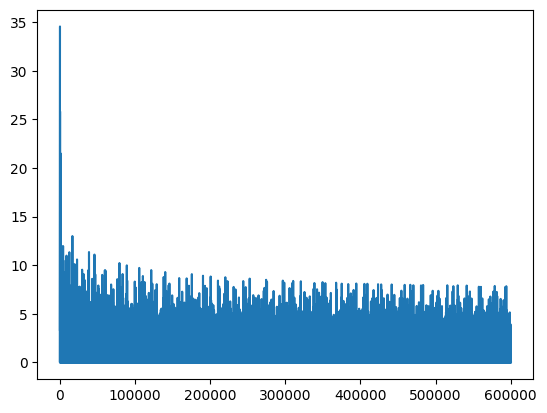

In [ ]:
loss,param=three_layer_nn_train(train_data,30,100,1e-5,3e-5,99)
w1,w2,w3,b1,b2,b3=param
print('Training error:',predict_nn(train_data,w1,w2,w3,b1,b2,b3))
print('Test error:',predict_nn(test_data,w1,w2,w3,b1,b2,b3))
plt.plot(loss)

In [ ]:
def result_nn(test_data,w1,w2,w3,b1,b2,b3):
  y=test_data.iloc[:,-1]
  x=test_data.iloc[:,:-1]
  x=x.to_numpy()
  y=y.to_numpy()
  op1,alcache1=affine_layer_forward(x,w1,b1)
  op2,scache1=sgm_forward(op1)
  op3,alcache2=affine_layer_forward(op2,w2,b2)
  op4,scache2=sgm_forward(op3)
  Y,alcache3=affine_layer_forward(op4,w3,b3)
  return np.sign(Y)

In [ ]:
h=result_nn(test_datam,w1,w2,w3,b1,b2,b3)

In [ ]:
loss,param=three_layer_nn_train(train_data,100,50,3e-4,1e-4,82)

In [ ]:
w1,w2,w3,b1,b2,b3=param

In [ ]:
plt.plot(loss)
plt.xlabel('#Updates')
plt.ylabel('Loss')
plt.title('Loss vs Updates')
plt.show()

In [ ]:
predict_nn(train_data,w1,w2,w3,b1,b2,b3)

In [ ]:
#PYtorch implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

In [ ]:
class varyinglayersNN(nn.Module):
  def __init__(self,input_dim,output_dim,hidden_dim,depth,activation):
    super(varyinglayersNN,self).__init__()
    layers=[]
    pr_dim=input_dim
    for i in range(depth):
      layers.append(nn.Linear(pr_dim,hidden_dim))
      nn.init.xavier_uniform_(layers[-1].weight) if activation=='tanh' else nn.init.kaiming_uniform_(layers[-1].weight,nonlinearity='relu')
      layers.append(nn.Tanh()) if activation=='tanh' else layers.append(nn.ReLU())
      pr_dim=hidden_dim

    layers.append(nn.Linear(pr_dim,output_dim))
    nn.init.xavier_uniform_(layers[-1].weight) if activation=='tanh' else nn.init.kaiming_uniform_(layers[-1].weight,nonlinearity='relu')

    self.model=nn.Sequential(*layers)

  def forward(self,x):
    return self.model(x)

In [ ]:
def trainloop(model,train_loader,criterion,optimizer,T):
  for i in range(T):
    for ip,l in train_loader:
      output=model(ip)
      l=l.unsqueeze(1)
      loss=criterion(output,l)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

In [ ]:
def testloop(model,test_loader):
  model.eval()
  pred=[]
  labe=[]
  with torch.no_grad():
    for ip,l in test_loader:
      output=model(ip)
      pred.extend(torch.sign(output).tolist())
      labe.extend(l.tolist())
  return accuracy_score(labe,pred)


In [ ]:
def resultloop(model,test_loader):
  model.eval()
  pred=[]
  labe=[]
  with torch.no_grad():
    for ip,l in test_loader:
      output=model(ip)
      pred.extend(torch.sign(output).squeeze().tolist())
      labe.extend(l.tolist())
  return pred

In [ ]:
def result_sum_loop(model,test_loader):
  model.eval()
  pred=[]
  labe=[]
  with torch.no_grad():
    for ip,l in test_loader:
      output=model(ip)
      #pred.extend(torch.sign(output).squeeze().tolist())
      #labe.extend(l.tolist())
  return output

In [ ]:
#Bagging Neural networks
models=[]
for i in range(100):
  train_datai=train_data.sample(frac = 1,replace=True)
  y=train_datai.iloc[:,-1]
  x=train_datai.iloc[:,:-1]
  x_ttrain = torch.tensor(x.values, dtype=torch.float32).cuda()
  y_ttrain= torch.tensor(y.values, dtype=torch.float32).cuda()
  train_dataset=TensorDataset(x_ttrain,y_ttrain)
  train_loader=DataLoader(train_dataset,batch_size=5000,shuffle=True)
  model=varyinglayersNN(13,1,150,9,'relu').cuda()
  optimizer=optim.Adam(model.parameters())
  criterion=nn.MSELoss()
  trainloop(model,train_loader,criterion,optimizer,100)
  print("Train accuracy:",testloop(model,train_loader))
  models.append(model)

Train accuracy: 0.92255
Train accuracy: 0.92655
Train accuracy: 0.914
Train accuracy: 0.9192
Train accuracy: 0.9205
Train accuracy: 0.93865
Train accuracy: 0.9117
Train accuracy: 0.9178
Train accuracy: 0.9204
Train accuracy: 0.92435
Train accuracy: 0.91895
Train accuracy: 0.9003
Train accuracy: 0.92245
Train accuracy: 0.9342
Train accuracy: 0.9152
Train accuracy: 0.92735
Train accuracy: 0.9101
Train accuracy: 0.9116
Train accuracy: 0.90995
Train accuracy: 0.9486
Train accuracy: 0.91335
Train accuracy: 0.92635
Train accuracy: 0.93205
Train accuracy: 0.92165
Train accuracy: 0.92885
Train accuracy: 0.9194
Train accuracy: 0.92075
Train accuracy: 0.92565
Train accuracy: 0.91605
Train accuracy: 0.93035
Train accuracy: 0.91255
Train accuracy: 0.91305
Train accuracy: 0.9175
Train accuracy: 0.93105
Train accuracy: 0.91925
Train accuracy: 0.916
Train accuracy: 0.9181
Train accuracy: 0.9298
Train accuracy: 0.91795
Train accuracy: 0.911
Train accuracy: 0.90425
Train accuracy: 0.923
Train accuracy:

In [ ]:
y=test_datam.iloc[:,-1]
x=test_datam.iloc[:,:-1]
x_ttestm = torch.tensor(x.values, dtype=torch.float32).cuda()
y_ttestm= torch.tensor(y.values, dtype=torch.float32).cuda()
test_dataset=TensorDataset(x_ttestm,y_ttestm)
test_loader=DataLoader(test_dataset,batch_size=1000,shuffle=False)
predp=0
for model in models:
   pred=[]
   for ip,l in test_loader:
      output=model(ip)
      pred.extend(output.squeeze().tolist())
   pred=np.array(pred)
   predp+=pred
   pred=[]
labe=[]
for ip,l in test_loader:
   labe.extend(l.tolist())
fpred=np.sign(predp)
accuracy_score(labe,fpred)

In [ ]:
h=fpred

In [ ]:
import csv
a=list(range(1,23843))
with open('/content/drive/MyDrive/income2023f/pytorchneuralnetworkbagging.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(a,h))

In [ ]:
y=train_data.iloc[:,-1]
x=train_data.iloc[:,:-1]
x_ttrain = torch.tensor(x.values, dtype=torch.float32)
y_ttrain= torch.tensor(y.values, dtype=torch.float32)
y=test_datam.iloc[:,-1]
x=test_datam.iloc[:,:-1]
x_ttestm = torch.tensor(x.values, dtype=torch.float32)
y_ttestm= torch.tensor(y.values, dtype=torch.float32)

In [ ]:
train_dataset=TensorDataset(x_ttrain,y_ttrain)
train_loader=DataLoader(train_dataset,batch_size=1000,shuffle=True)

In [ ]:
test_dataset=TensorDataset(x_ttestm,y_ttestm)
test_loader=DataLoader(test_dataset,batch_size=1000,shuffle=False)

In [ ]:
#search for hyper parameters
for i in ['tanh','relu']:
  for j in [3, 5, 9]:
    for k in [15, 50, 75, 100, 150]:
      model=varyinglayersNN(13,1,k,j,i)
      optimizer=optim.Adam(model.parameters())
      criterion=nn.MSELoss()
      trainloop(model,train_loader,criterion,optimizer,100)
      print('Activation:'+i+' '+'Depth:'+ str(j)+' '+'Hidden layer:',k)
      print("Train accuracy:",testloop(model,train_loader))
      print("Test accuracy:",testloop(model,test_loader))

Activation:tanh Depth:3 Hidden layer: 15
Train accuracy: 0.8443
Test accuracy: 0.8448
Activation:tanh Depth:3 Hidden layer: 50
Train accuracy: 0.8479
Test accuracy: 0.8456
Activation:tanh Depth:3 Hidden layer: 75
Train accuracy: 0.84975
Test accuracy: 0.8484
Activation:tanh Depth:3 Hidden layer: 100
Train accuracy: 0.8485
Test accuracy: 0.8468
Activation:tanh Depth:3 Hidden layer: 150
Train accuracy: 0.8514
Test accuracy: 0.8492
Activation:tanh Depth:5 Hidden layer: 15
Train accuracy: 0.84535
Test accuracy: 0.8444
Activation:tanh Depth:5 Hidden layer: 50
Train accuracy: 0.85395
Test accuracy: 0.8502
Activation:tanh Depth:5 Hidden layer: 75
Train accuracy: 0.85245
Test accuracy: 0.8472
Activation:tanh Depth:5 Hidden layer: 100
Train accuracy: 0.8585
Test accuracy: 0.8516
Activation:tanh Depth:5 Hidden layer: 150
Train accuracy: 0.859
Test accuracy: 0.8504
Activation:tanh Depth:9 Hidden layer: 15
Train accuracy: 0.84735
Test accuracy: 0.8446
Activation:tanh Depth:9 Hidden layer: 50
Train

In [ ]:
model=varyinglayersNN(13,1,150,9,'tanh') #best one
optimizer=optim.Adam(model.parameters())
criterion=nn.MSELoss()
trainloop(model,train_loader,criterion,optimizer,100)

In [ ]:
print("Train accuracy:",testloop(model,train_loader))

Train accuracy: 0.8661


In [ ]:
h=resultloop(model,test_loader)

In [ ]:
#csv writer
import csv
a=list(range(1,23843))
with open('/content/drive/MyDrive/income2023f/pytorchneuralnetwork.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(a,h))

In [ ]:
def logistic_regression(train_data,v,obj,gamma_init,d):
  w=np.zeros(train_data.iloc[0,:-1].shape[0]+1)
  loss=[]
  for j in range(100):
    train_data=train_data.sample(frac = 1)
    y=train_data.iloc[:,-1]
    x=train_data.iloc[:,:-1]
    x=x.to_numpy()
    y=y.to_numpy()
    x=np.insert(x, 0, 1, axis=1)
    gamma_t= gamma_init/(1+(gamma_init/d)*j)
    for i in range(len(x)):
      if obj=='map':
        L=len(x)*np.log(1+np.exp(-y[i]*(np.dot(w,x[i]))))+1/(2*v)*np.dot(w,w)
        gL=w/v-len(x)*y[i]*x[i]*(1-sgm(y[i]*(np.dot(w,x[i]))))
        loss.append(L)
      else:
        L=len(x)*np.log(1+np.exp(-y[i]*(np.dot(w,x[i]))))
        gL=-len(x)*y[i]*x[i]*(1-sgm(y[i]*(np.dot(w,x[i]))))
        loss.append(L)
      w-=gamma_t*gL
  return w,loss

In [ ]:
def prediction_standard(test_data,w):
  y=test_data.iloc[:,-1]
  x=test_data.iloc[:,:-1]
  x=x.to_numpy()
  y=y.to_numpy()
  x=np.insert(x, 0, 1, axis=1)
  pred=np.dot(x,w)
  pred_s=np.sign(pred)
  diff=np.where((pred_s*y)==-1,1,0)
  return(np.sum(diff)/diff.shape[0])

In [ ]:
def prediction_result(test_data,w):
  y=test_data.iloc[:,-1]
  x=test_data.iloc[:,:-1]
  x=x.to_numpy()
  y=y.to_numpy()
  x=np.insert(x, 0, 1, axis=1)
  pred=np.dot(x,w)
  pred_s=np.sign(pred)
  diff=np.where((pred_s*y)==-1,1,0)
  return pred

In [ ]:
def q4(train_data,test_data):
  for j in ['map','ml']:
    for i in [0.01, 0.1, 0.5, 1, 3, 5, 10, 100]:
      w,l=logistic_regression(train_data,i,j,1e-4,1e-4)
      print(str(j).upper()+' with v=',i)
      print('Training error:',prediction_standard(train_data,w))
      print('Test error:',prediction_standard(test_data,w))
      plt.plot(l)
      plt.xlabel('#Updates')
      plt.ylabel('Loss')
      plt.title('Loss vs Updates')
      plt.show()

In [ ]:
#bagging logistic regression
wa=[]
for i in range(50):
   train_data=train_data.sample(frac = 1,replace=True)
   w,l=logistic_regression(train_data,0.1,'ml',1e-4,1e-4)
   wa.append(w)
   print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:

y=test_data.iloc[:,-1]
x=test_data.iloc[:,:-1]
x=x.to_numpy()
y=y.to_numpy()
x=np.insert(x, 0, 1, axis=1)
pred=0
for w in wa:
  pred+=np.dot(x,w)
pred=np.sign(pred)
diff=np.where((pred*y)==-1,1,0)
print((np.sum(diff)/diff.shape[0]))

0.0


In [ ]:
print('Training error:',prediction_standard(train_data,w))
print('Test error:',prediction_standard(test_data,w))

Training error: 0.16025
Test error: 0.1578


In [ ]:
h=pred

In [ ]:
h=np.where(h < np.mean(h), -1, 1) #using a different threshold

In [ ]:
import csv
a=list(range(1,23843))
with open('/content/drive/MyDrive/income2023f/logiregretreshm50bag.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(a,h))

MAP with v= 0.01
Training error: 0.1902
Test error: 0.1928


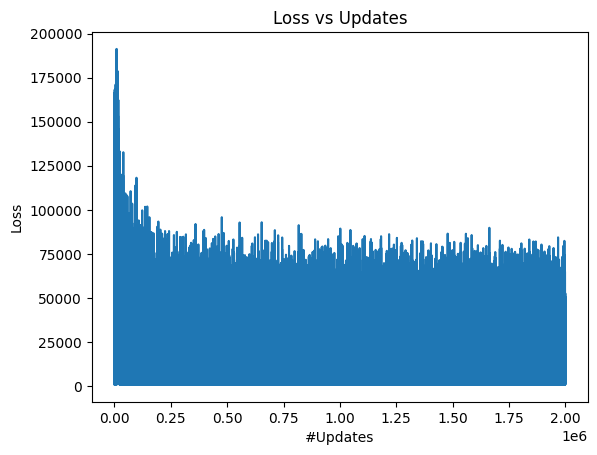

MAP with v= 0.1
Training error: 0.17405
Test error: 0.1726


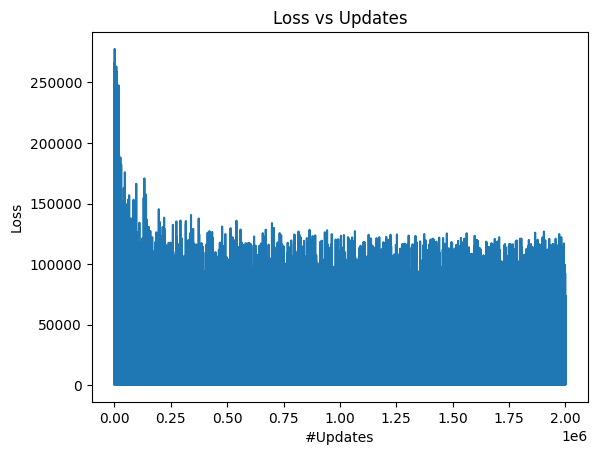

MAP with v= 0.5
Training error: 0.1669
Test error: 0.166


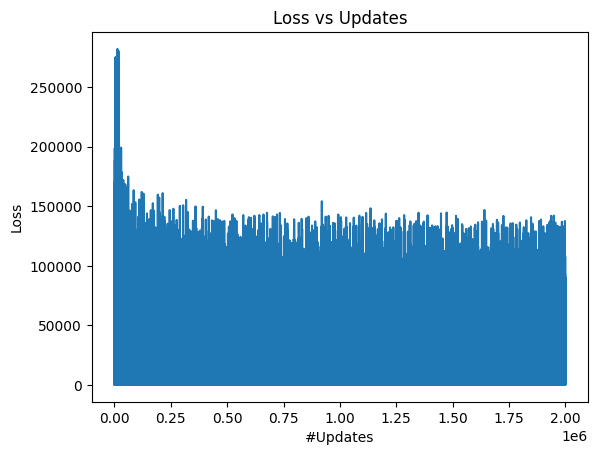

MAP with v= 1
Training error: 0.16425
Test error: 0.1636


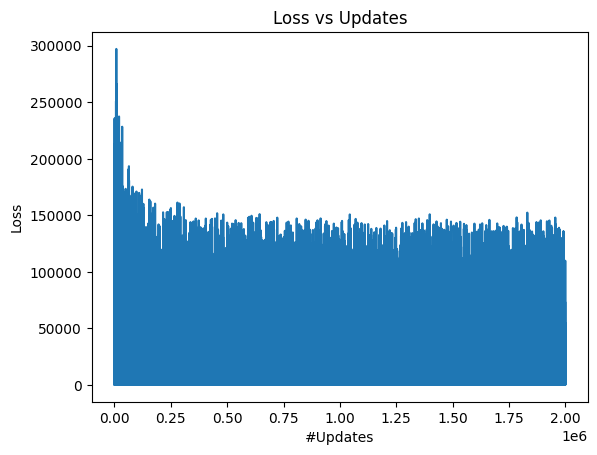

MAP with v= 3
Training error: 0.1609
Test error: 0.1608


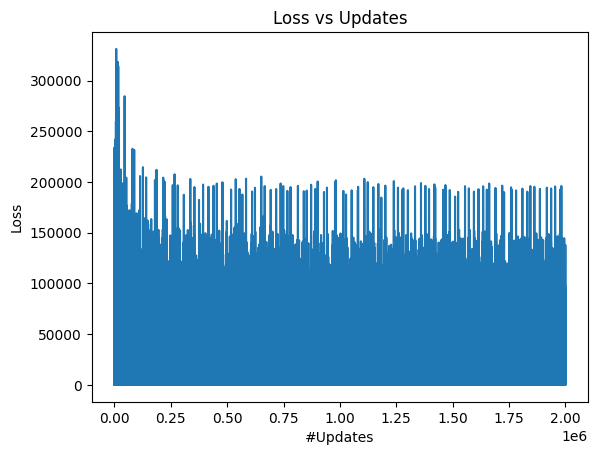

MAP with v= 5
Training error: 0.1601
Test error: 0.1592


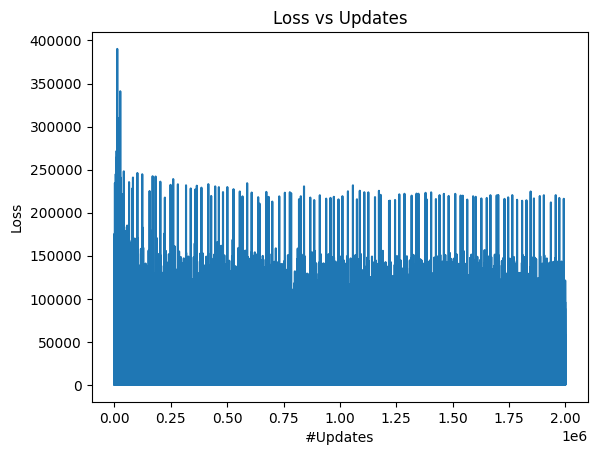

MAP with v= 10
Training error: 0.15915
Test error: 0.1582


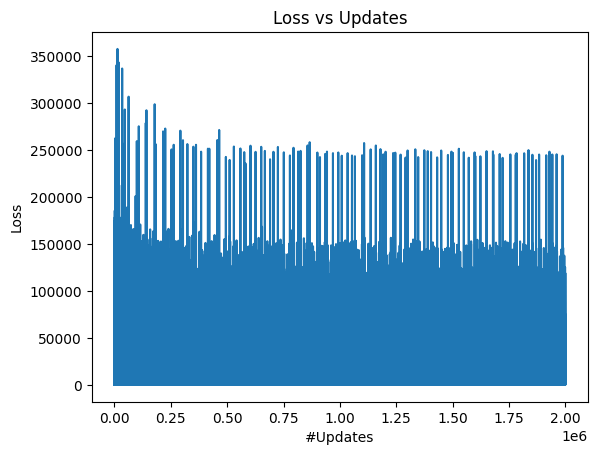

MAP with v= 100
Training error: 0.15975
Test error: 0.1582


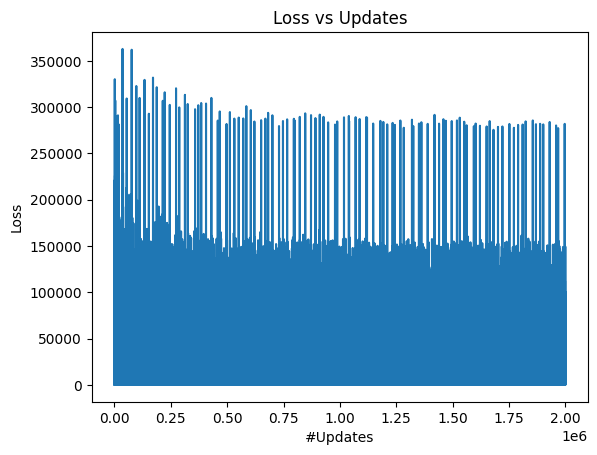

ML with v= 0.01
Training error: 0.1609
Test error: 0.1576


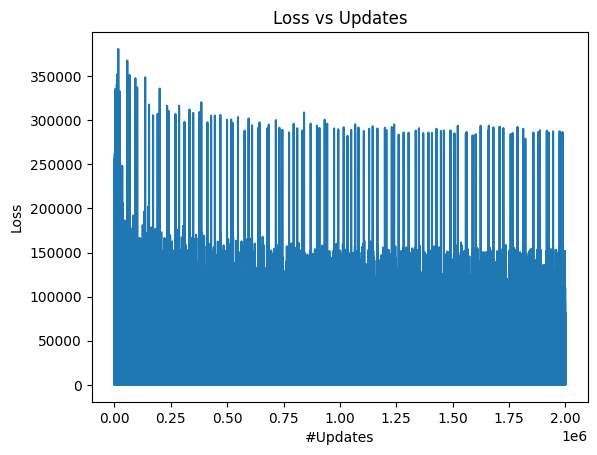

ML with v= 0.1
Training error: 0.1599
Test error: 0.158


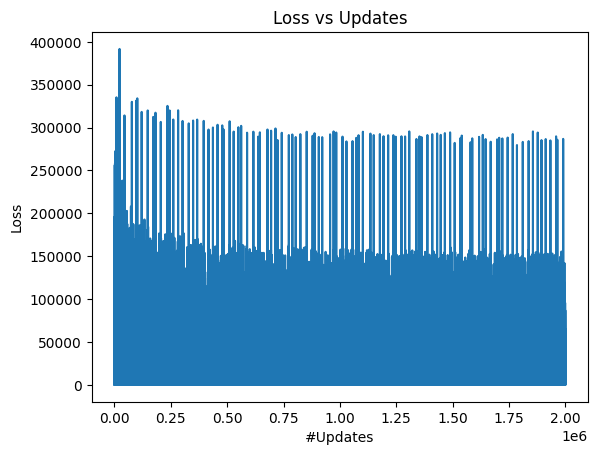

ML with v= 0.5
Training error: 0.1599
Test error: 0.1592


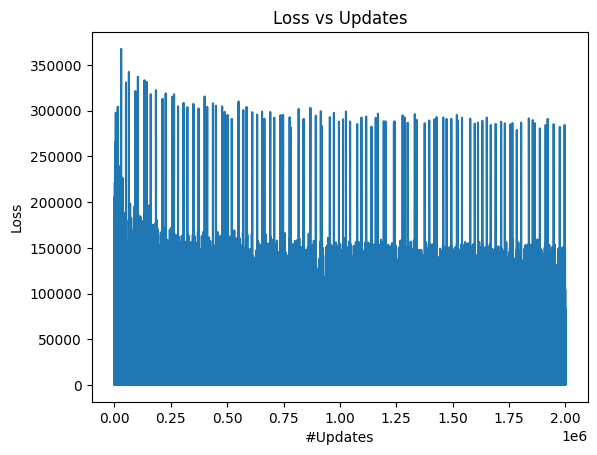

ML with v= 1
Training error: 0.1611
Test error: 0.1594


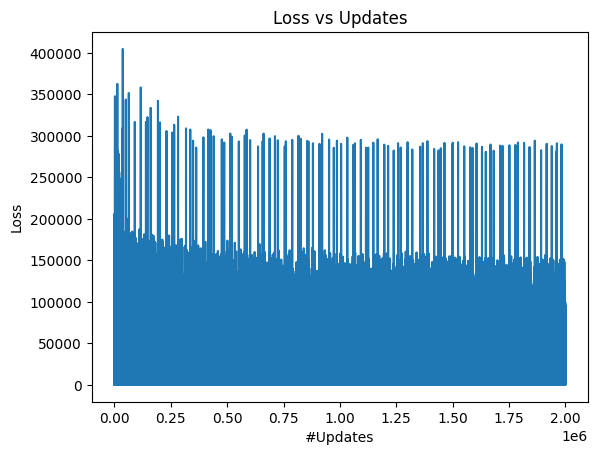

ML with v= 3
Training error: 0.16045
Test error: 0.16


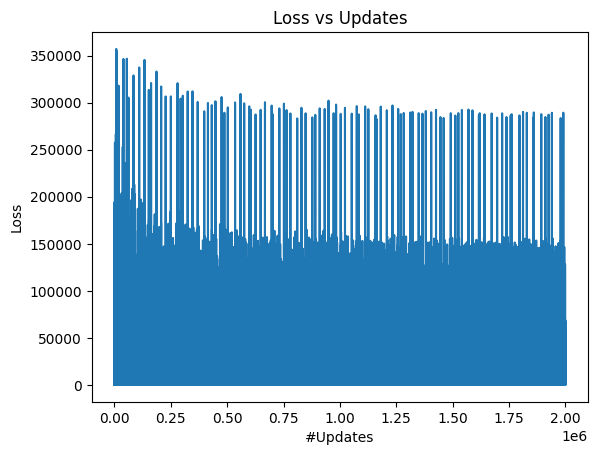

ML with v= 5
Training error: 0.16075
Test error: 0.1586


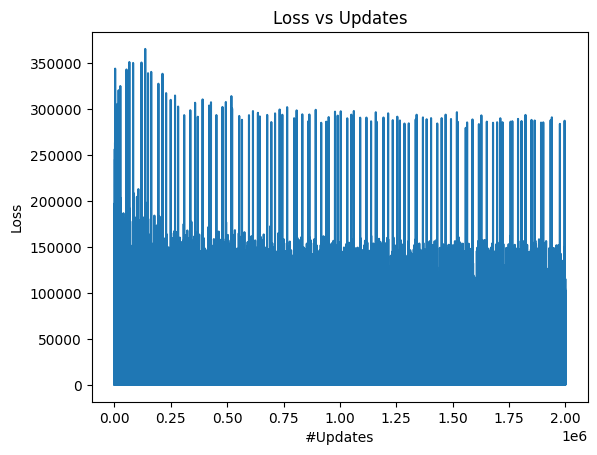

ML with v= 10
Training error: 0.16035
Test error: 0.1598


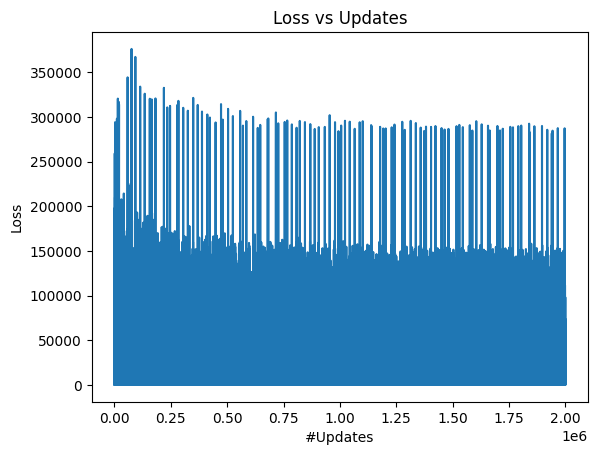

KeyboardInterrupt: ignored

In [ ]:
q4(train_data,test_data) #search for hyperparameters

In [ ]:
w,l=logistic_regression(train_data,0.1,'ml',1e-4,1e-4) #best parameters

In [ ]:
prediction_standard(test_data,w)

0.012

In [ ]:
y=test_data.iloc[:,-1]
x=test_data.iloc[:,:-1]
x=x.to_numpy()
y=y.to_numpy()
x=np.insert(x, 0, 1, axis=1)
pred=np.dot(x,w)
pred=np.sign(pred)
diff=np.where((pred*y)==-1,1,0)
print((np.sum(diff)/diff.shape[0]))

In [ ]:
h=pred

In [ ]:
h=np.where(h < np.mean(h), -1, 1) #using a different threshold

In [ ]:
import csv
a=list(range(1,23843))
with open('/content/drive/MyDrive/income2023f/logiregretreshm.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(a,h))

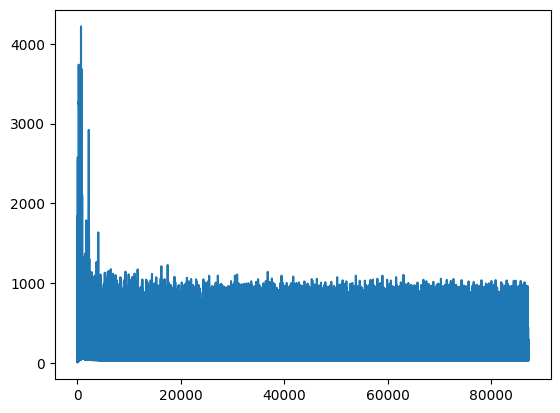

In [ ]:
plt.plot(l)